[*********************100%***********************]  1 of 1 completed


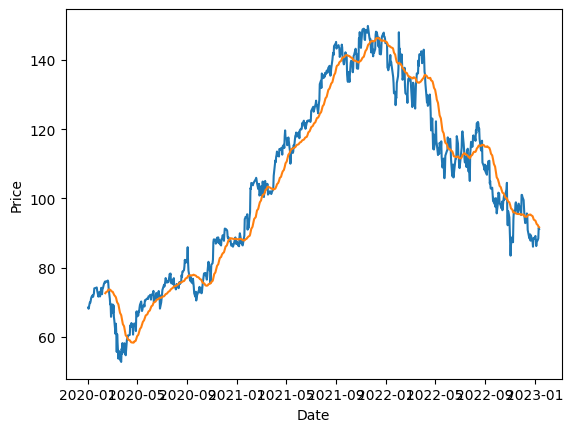

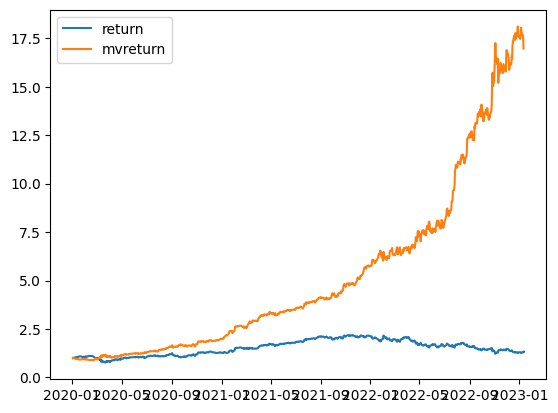

In [1]:
# Importing packages
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
# Load the time series data
stock = "GOOGL"
data = yf.download(stock, '2020-01-01', '2023-1-13')

# Calculate the moving average
data['moving_average'] = data['Close'].rolling(window=30).mean()
data["return"] = data['Close'].pct_change()

signal = 2*(data['Close']>data["moving_average"])-1
data["mv_return"] = signal[:-1]*data["return"][1:]
# Create the line chart
plt.plot(data['Close'], label='Close')
plt.plot(data['moving_average'], label='Moving Average')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Price')


# Display the chart
plt.show()

plt.plot(np.cumprod(1+data['return']), label='return')
plt.plot(np.cumprod(1+data['mv_return']), label='mvreturn')
plt.legend()
plt.show()